<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/knn_przyklad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


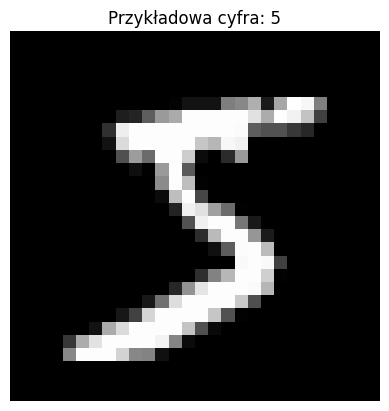

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8742 - loss: 0.4383 - val_accuracy: 0.9687 - val_loss: 0.1096
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9657 - loss: 0.1143 - val_accuracy: 0.9702 - val_loss: 0.1001
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9781 - loss: 0.0725 - val_accuracy: 0.9752 - val_loss: 0.0797
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9833 - loss: 0.0532 - val_accuracy: 0.9765 - val_loss: 0.0847
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9877 - loss: 0.0393 - val_accuracy: 0.9765 - val_loss: 0.0818
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.0988
Dokładność na danych testowych: 97.37%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


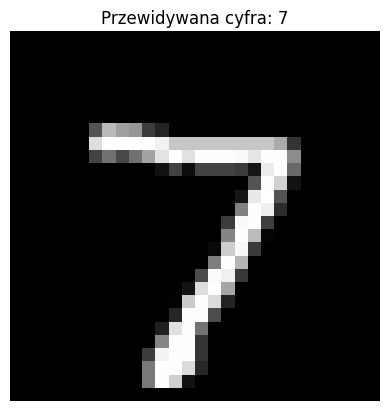

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Wczytanie i przygotowanie danych MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizacja danych (0-255 -> 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Wyświetlenie przykładowego obrazu
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Przykładowa cyfra: {y_train[0]}")
plt.axis('off')
plt.show()

# 2. Tworzenie modelu sieci neuronowej
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Spłaszczenie obrazu 28x28 do wektora 784-elementowego
    Dense(128, activation='relu'), # Warstwa ukryta z 128 neuronami
    Dense(64, activation='relu'),  # Warstwa ukryta z 64 neuronami
    Dense(10, activation='softmax') # Warstwa wyjściowa z 10 neuronami (dla klas 0-9)
])

# 3. Kompilacja modelu
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Trenowanie modelu
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 5. Ewaluacja modelu
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Dokładność na danych testowych: {accuracy * 100:.2f}%")

# 6. Przykładowe przewidywanie
sample_image = X_test[0]
prediction = model.predict(sample_image.reshape(1, 28, 28))
predicted_class = prediction.argmax()

# Wyświetlenie przewidywania
plt.imshow(sample_image, cmap='gray')
plt.title(f"Przewidywana cyfra: {predicted_class}")
plt.axis('off')
plt.show()
